# Installations

###### Since we are going to use some of the fastai tools, that's why I prefered to use google colab.
###### For this reasone we need to install fastai 0.7

In [1]:
pip install fastai==0.7

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

# Error: Go with the /usr/local/lib/python3.6/dist-packages/fastai/structured.py link in the error, and remove the
# "from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler" since instead of this we are going to use simple imputer.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Import simple imputer
from sklearn.impute._base import SimpleImputer as Imputer

In [5]:
# Accessing local files:
from google.colab import files
uploaded = files.upload()
# Press "Choose File" and choose the stock.csv file

Saving stock.csv to stock (1).csv


### 1. Project's Installations

In [6]:
# We are going to do ARIMA prediction as well, for this we need 'pyramid.arima' package to be installed.
!pip install pyramid.arima

  Using cached https://files.pythonhosted.org/packages/5c/84/57422f2a6ade3161c586545e38b518ba1b7ab30ee4a4acc29110c0aba2bc/pyramid_arima-0.9.0-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
# Thies is for facebook prophet prediction.
!pip install fbprophet

In [7]:
# Import packages
import pandas as pd
import numpy as np

# For plotting within notebook
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

# For setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# For normalizing data, preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# For Models
# 1. Linear Regression
from fastai.structured import  add_datepart
from sklearn.linear_model import LinearRegression
# 2. KNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
# 3. ARIMA
from sklearn import metrics
from pyramid.arima import auto_arima
# 4. Prophet
from fbprophet import Prophet
import datetime as dt
# 5. LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

### 2. Read the data

In [8]:
# read the file
df = pd.read_csv('stock.csv')

# print the head
print('Table 1. TATA data first 5 rows')
df.head()

Table 1. TATA data first 5 rows


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
# the shape of the data
print('\n Shape of the data:')
print(df.shape)


 Shape of the data:
(2035, 8)


In [10]:
# let's get an information about the format of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
# Above we can notice that 'Date' has an object type but need to be datatime type
# Convert "Date" into datetime
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

### 3. Visualizing the data

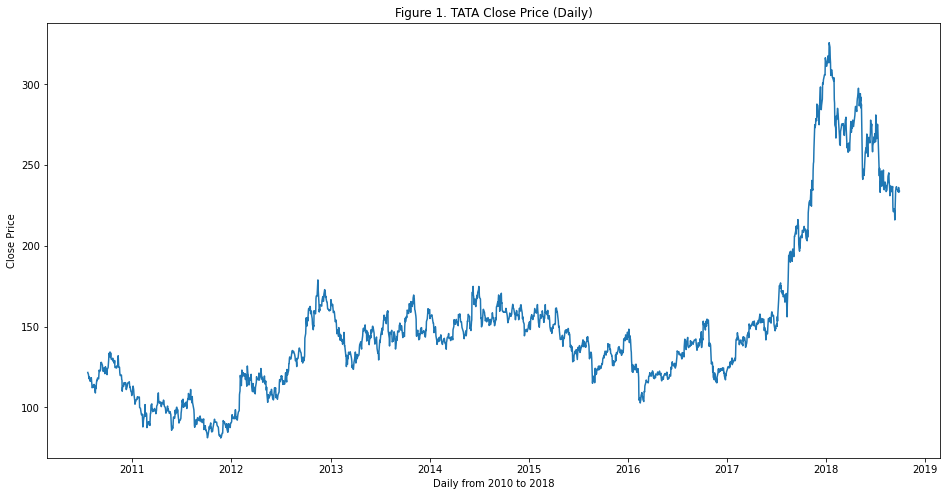

In [12]:
# Plot the Close price
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.xlabel('Daily from 2010 to 2018')
plt.ylabel('Close Price')
plt.title('Figure 1. TATA Close Price (Daily)')
plt.show()

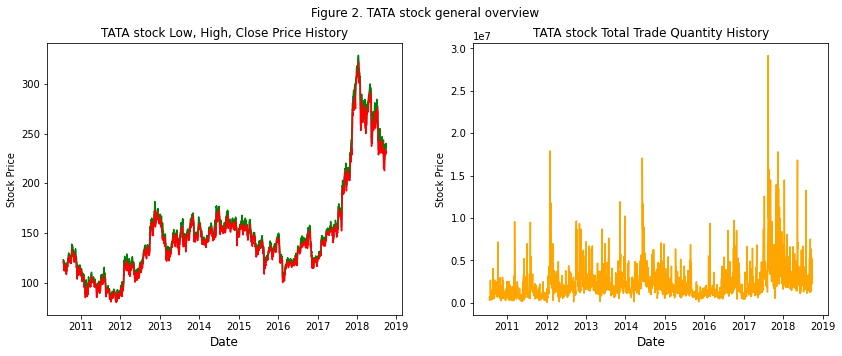

In [13]:
# Simple plotting of TATA Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(df["Date"], df["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("TATA stock Low, High, Close Price History")

# Second Subplot
ax1.plot(df["Date"], df["High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("TATA stock Low, High, Close Price History")

# Third Subplot
ax1.plot(df["Date"], df["Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("TATA stock Low, High, Close Price History")

# Fourth Subplot
ax2.plot(df["Date"], df["Total Trade Quantity"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("TATA stock Total Trade Quantity History")

f.suptitle('Figure 2. TATA stock general overview') 
plt.show()

# Models

### 1. Linear Regression

In [14]:
# Creating dataframe with date and the target variable (Close Price)
# sorting
data = df.sort_index(ascending=True, axis=0)

# creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [15]:
#create features
add_datepart(new_data, 'Date')

###### This "add_datepart" creates features such as:
###### ‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

In [16]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,121.55,2010,7,29,21,2,202,False,False,False,False,False,False,1279670400
1,120.9,2010,7,29,22,3,203,False,False,False,False,False,False,1279756800
2,120.65,2010,7,29,23,4,204,False,False,False,False,False,False,1279843200
3,117.6,2010,7,30,26,0,207,False,False,False,False,False,False,1280102400
4,118.65,2010,7,30,27,1,208,False,False,False,False,False,False,1280188800


In [17]:
# Elapsed will be the time stamp
# drop the 'Elapsed' from the new_data
new_data.drop('Elapsed', axis=1, inplace=True)

Let's add our own set of features that we believe would be relevant for the predictions. It would be an interesting to see and make an hypothesis that the first and the the last days of the week could potentially affect the closing price of the stock far more than the other days.
So, below you can see the created feature that identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday. 

In [18]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Note: While splitting the data into train and test set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into test and the 4 years’ data before that into train set.

In [19]:
# splitting into train and test sets
train = new_data[:1000]
test = new_data[1000:]

In [20]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of test set
print('\n Shape of test set:')
print(test.shape)


 Shape of training set:
(1000, 14)

 Shape of test set:
(1035, 14)


In [21]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [22]:
x_train.head()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2010,7,29,21,2,202,False,False,False,False,False,False,0
1,2010,7,29,22,3,203,False,False,False,False,False,False,0
2,2010,7,29,23,4,204,False,False,False,False,False,False,1
3,2010,7,30,26,0,207,False,False,False,False,False,False,1
4,2010,7,30,27,1,208,False,False,False,False,False,False,0


In [23]:
# Implement linear regression
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# make predictions
preds_LR = model_LR.predict(x_test)
# find the rmse
rms_LR = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_LR)),2)))
rms_LR

50.83748421013719

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Figure 3.     1) Linear Regression Prediction')

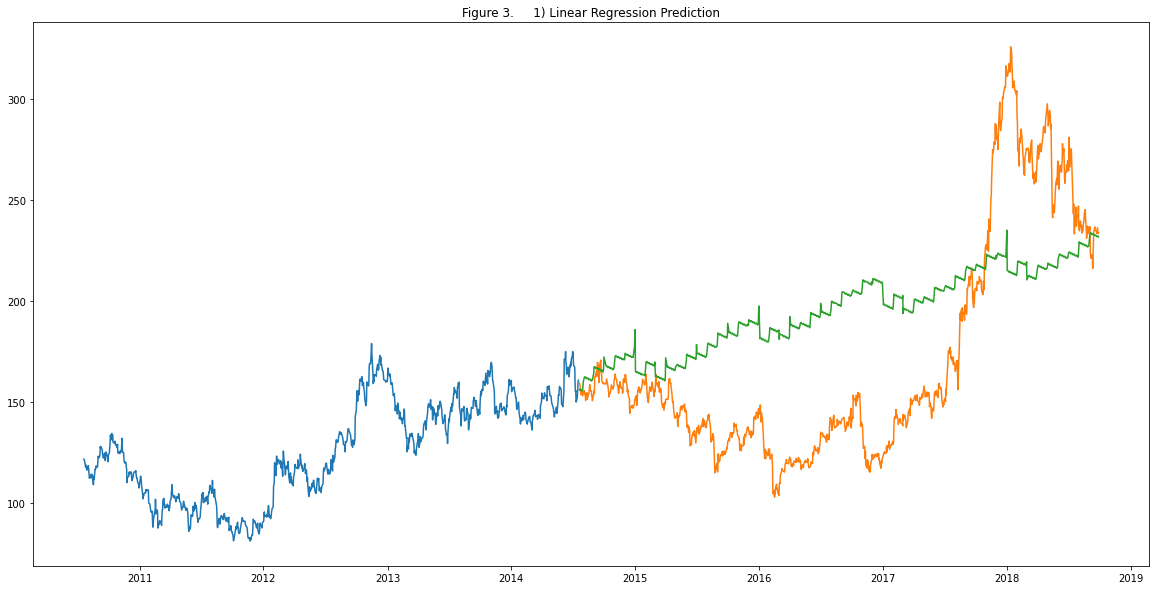

In [25]:
# Linear Regression plot
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

test['Predictions_LR'] = 0
test['Predictions_LR'] = preds_LR

test.index = new_data[1000:].index
train.index = new_data[:1000].index

plt.plot(data[:1000]['Date'], train['Close'])
plt.plot(data[1000:]['Date'] , test[['Close', 'Predictions_LR']])
plt.title('Figure 3.     1) Linear Regression Prediction')

### 2. KNN

In [26]:
# scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

# using gridsearch to find the best parameter
params = {'n_neighbors':[3,5,7,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

# fit the model 
model_knn.fit(x_train,y_train)

# make predictions
preds_knn = model_knn.predict(x_test)

In [27]:
#rmse
rms_knn = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_knn)),2)))
rms_knn

63.55913394831834

In [28]:
test.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Predictions_LR
1000,159.2,2014,7,30,21,0,202,False,False,False,False,False,False,1,155.779187
1001,158.7,2014,7,30,22,1,203,False,False,False,False,False,False,0,156.168649
1002,156.8,2014,7,30,23,2,204,False,False,False,False,False,False,0,156.177297
1003,156.55,2014,7,30,24,3,205,False,False,False,False,False,False,0,156.185946
1004,153.5,2014,7,30,25,4,206,False,False,False,False,False,False,1,155.813780


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Figure 4.     2) k-NN Prediction')

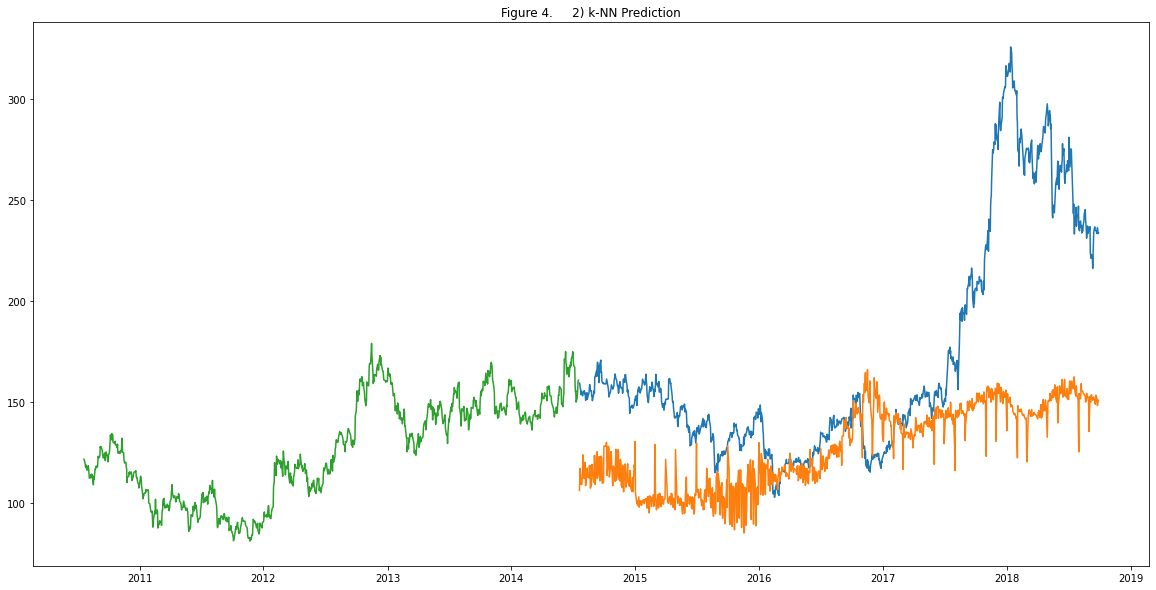

In [29]:
#plot
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

test['Predictions_knn'] = 0
test['Predictions_knn'] = preds_knn

plt.plot(data[1000:]['Date'] ,test[['Close', 'Predictions_knn']])
plt.plot(data[:1000]['Date'],train['Close'])
plt.title('Figure 4.     2) k-NN Prediction')

### 3. ARIMA

In [30]:
training = train['Close']
testing = test['Close']

In [31]:
model_ARIMA = auto_arima(training, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4799.763, BIC=4824.236, Fit time=27.813 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5456.823, BIC=5466.613, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5198.543, BIC=5218.122, Fit time=2.556 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4799.640, BIC=4819.219, Fit time=8.149 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4800.467, BIC=4824.940, Fit time=11.859 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5458.433, BIC=5473.117, Fit time=0.625 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=4800.300, BIC=4824.774, Fit time=30.406 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4803.087, BIC=4832.455, Fit time=40.508 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=4797.669, BIC=4812.353, Fit time=5.688 seconds
Fit ARIMA: order=(0, 1, 

In [32]:
# make prediction
preds_ARIMA = model_ARIMA.predict(n_periods=len(test))
# make the prediction as a dataframe
preds_ARIMA = pd.DataFrame(preds_ARIMA,index = test.index,columns=['Predictions_ARIMA'])

In [33]:
# rmse
rms_ARIMA=np.sqrt(np.mean(np.power((np.array(test['Close'])-np.array(preds_ARIMA['Predictions_ARIMA'])),2)))
rms_ARIMA

95.99936278551486

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Figure 5.     3) ARIMA Prediction')

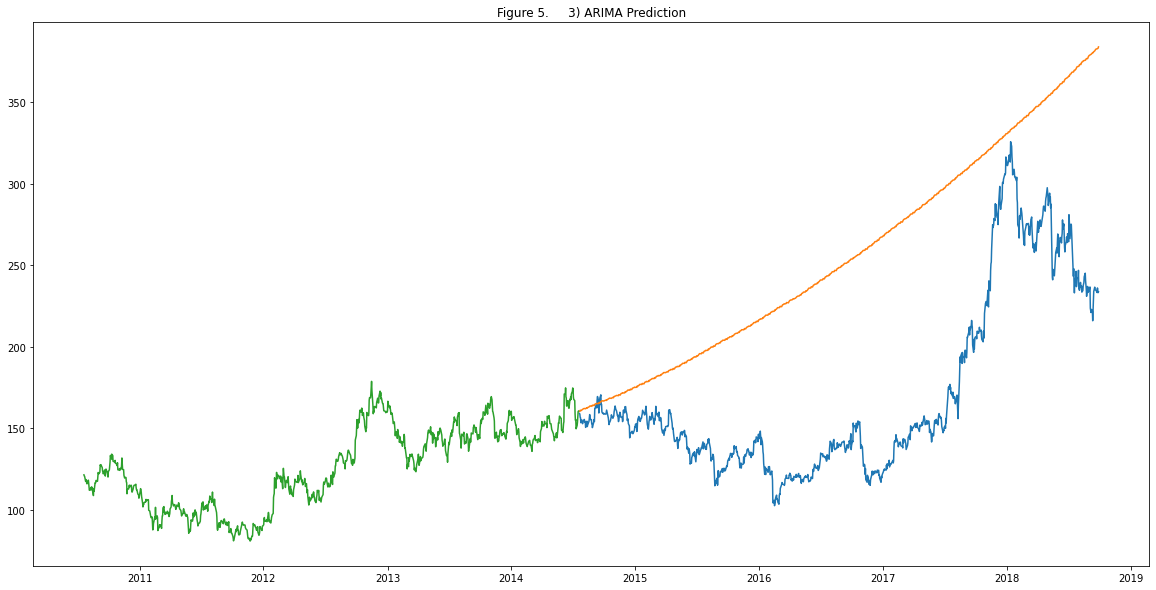

In [34]:
#plot
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

test['Predictions_ARIMA'] = 0
test['Predictions_ARIMA'] = preds_ARIMA

test.index = new_data[1000:].index
train.index = new_data[:1000].index


#plt.plot(data[1000:]['Date'] ,test[['Close', 'Predictions']])
#plt.plot(data[:1000]['Date'],train['Close'])
#plt.title('Figure 4.     2) k-NN Prediction')

plt.plot(data[1000:]['Date'], test[['Close', 'Predictions_ARIMA']])
plt.plot(data[:1000]['Date'], train['Close'])
plt.title('Figure 5.     3) ARIMA Prediction')

In [35]:
test.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Predictions_LR,Predictions_knn,Predictions_ARIMA
1000,159.2,2014,7,30,21,0,202,False,False,False,False,False,False,1,155.779187,106.078,160.529506
1001,158.7,2014,7,30,22,1,203,False,False,False,False,False,False,0,156.168649,113.178,160.584861
1002,156.8,2014,7,30,23,2,204,False,False,False,False,False,False,0,156.177297,116.983,161.128212
1003,156.55,2014,7,30,24,3,205,False,False,False,False,False,False,0,156.185946,114.75,161.108311
1004,153.5,2014,7,30,25,4,206,False,False,False,False,False,False,1,155.813780,109.061,160.845048


### 4. Prophet

First version

In [36]:
model_ph = Prophet()

ph_df = pd.DataFrame(index=range(0,len(df)), columns=['Date', 'Close'])

for i in range(0,len(data)):
    ph_df['Date'][i] = data['Date'][i]
    ph_df['Close'][i] = data['Close'][i]

ph_df['Date'] = pd.to_datetime(ph_df.Date,format='%Y-%m-%d')
ph_df.index = ph_df['Date']


ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
Date,,
2010-07-21,2010-07-21,121.55
2010-07-22,2010-07-22,120.9
2010-07-23,2010-07-23,120.65
2010-07-26,2010-07-26,117.6
2010-07-27,2010-07-27,118.65


In [37]:
# fit the model
model_ph.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# Create Future dates
future_prices = model_ph.make_future_dataframe(periods=365)

# Predict Prices
forecast = model_ph.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2395,2019-09-24,392.058871,362.499155,421.139257
2396,2019-09-25,393.156124,364.583983,421.479252
2397,2019-09-26,394.084034,365.472529,421.914912
2398,2019-09-27,394.289787,366.100450,422.919457
2399,2019-09-28,397.556270,369.245595,426.038887


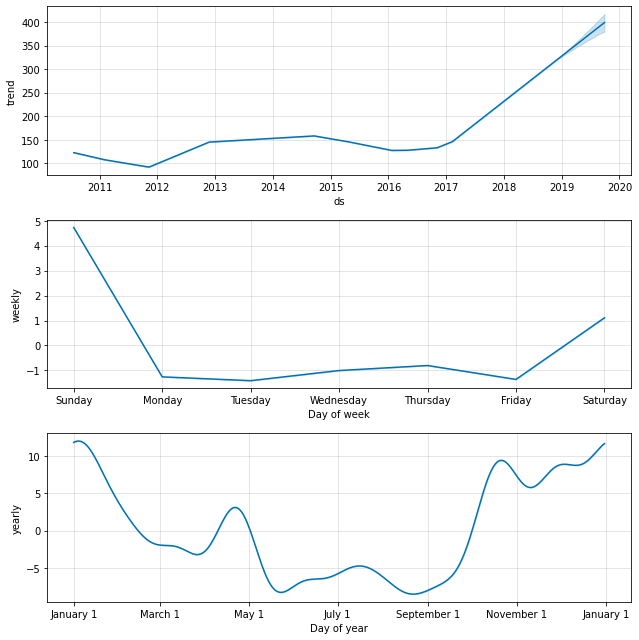

In [39]:
fig2 = model_ph.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


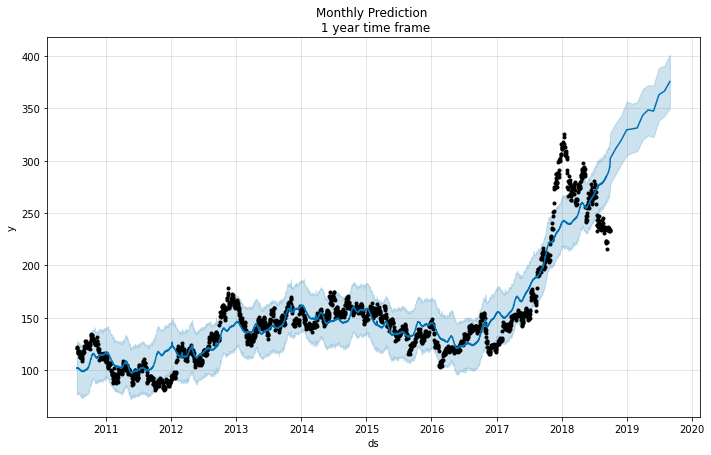

In [40]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

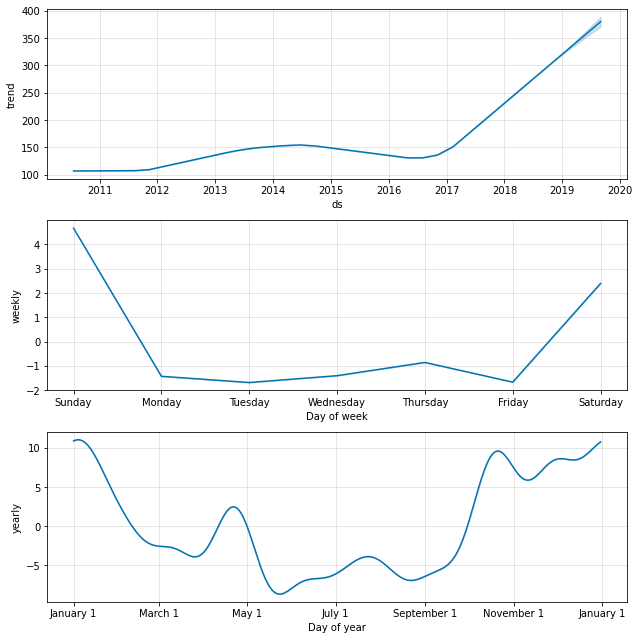

In [41]:
fig = m.plot_components(fcst)
plt.show()

In [42]:
#train and test
m = Prophet()
train = ph_df[:1000]
test = ph_df[1000:]

#fit the model on train set
m.fit(train)

#predictions
close_prices = m.make_future_dataframe(periods=len(test))
preds_ph = m.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
#rmse
preds_ph_test = preds_ph['yhat'][1000:]
rms=np.sqrt(np.mean(np.power((np.array(test['y'])-np.array(preds_ph_test)),2)))
rms

50.90652891173448

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



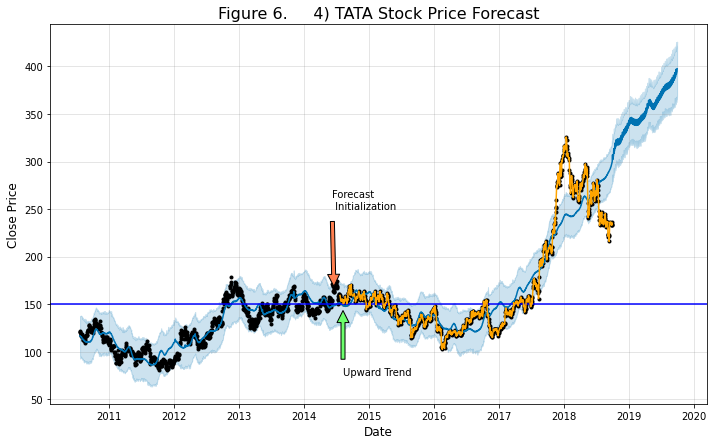

In [44]:
# Dates
starting_date = dt.datetime(2014, 6, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2014, 8, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2014, 6, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)


fig = model_ph.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Figure 6.     4) TATA Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 160), xytext=(starting_date1,250),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 150), xytext=(trend_date1,75),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=150, color='b', linestyle='-')

plt.plot(test['y'], color='orange')
plt.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



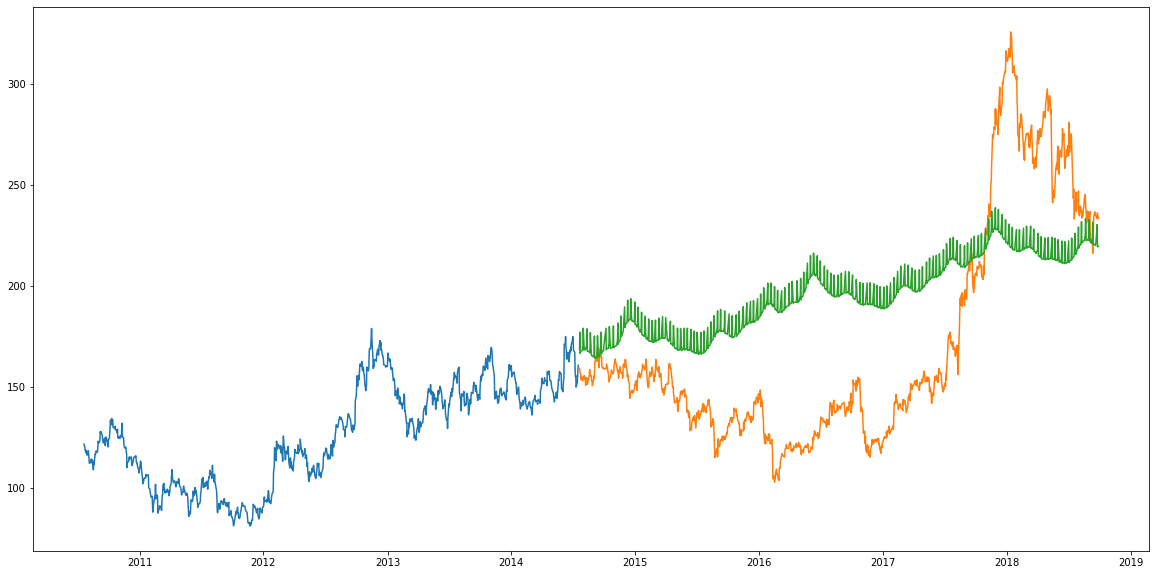

In [45]:
#plot
test['Predictions_ph'] = 0
test['Predictions_ph'] = preds_ph_test.values

plt.plot(train['y'])
plt.plot(test[['y', 'Predictions_ph']]);

In [46]:
test.head()

,ds,y,Predictions_ph
Date,,,
2014-07-21,2014-07-21,159.2,168.427921
2014-07-22,2014-07-22,158.7,177.030875
2014-07-23,2014-07-23,156.8,166.516116
2014-07-24,2014-07-24,156.55,167.215630
2014-07-25,2014-07-25,153.5,167.639391


### 5. LSTM

In [47]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1000,:]
test = dataset[1000:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 38s - loss: 0.0011


In [48]:
# rmse
rms_LSTM=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms_LSTM

7.183113221680846

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Figure 7.     5) LSTM Prediction')

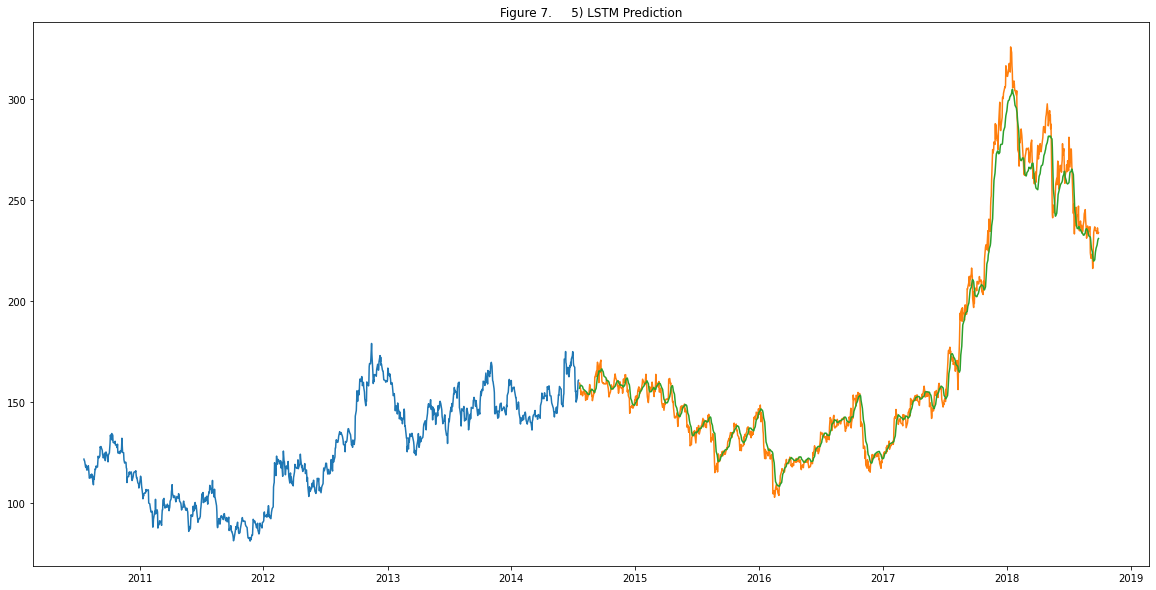

In [49]:
#for plotting
train = new_data[:1000]
test = new_data[1000:]
test['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
plt.title('Figure 7.     5) LSTM Prediction')

# The End :)

In [50]:
!pip list -v

Package                  Version         Location                               Installer
------------------------ --------------- -------------------------------------- ---------
absl-py                  0.9.0           /usr/local/lib/python3.6/dist-packages pip      
alabaster                0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations           0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                   4.1.0           /usr/local/lib/python3.6/dist-packages pip      
asgiref                  3.2.9           /usr/local/lib/python3.6/dist-packages pip      
astor                    0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                  4.0.1.post1     /usr/local/lib/python3.6/dist-packages pip      
astunparse               1.6.3           /usr/local/lib/python3.6/dist-packages pip      
atari-py                 0.2.6           /usr/local/lib/python3.6/dist-packages pip      
atomicwrit